In [ ]:
import numpy as np
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 10)


from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PowerTransformer, StandardScaler
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [2]:
data = pd.read_csv('C:/Users/HP/Documents/Sam/Greenwich University/Term 2/Project/Final Project/healthcare-dataset-stroke-data.csv')
target = data['stroke']

In [3]:
data = data.drop(['id'], axis = 1)

# Exploratory Data Analysis


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


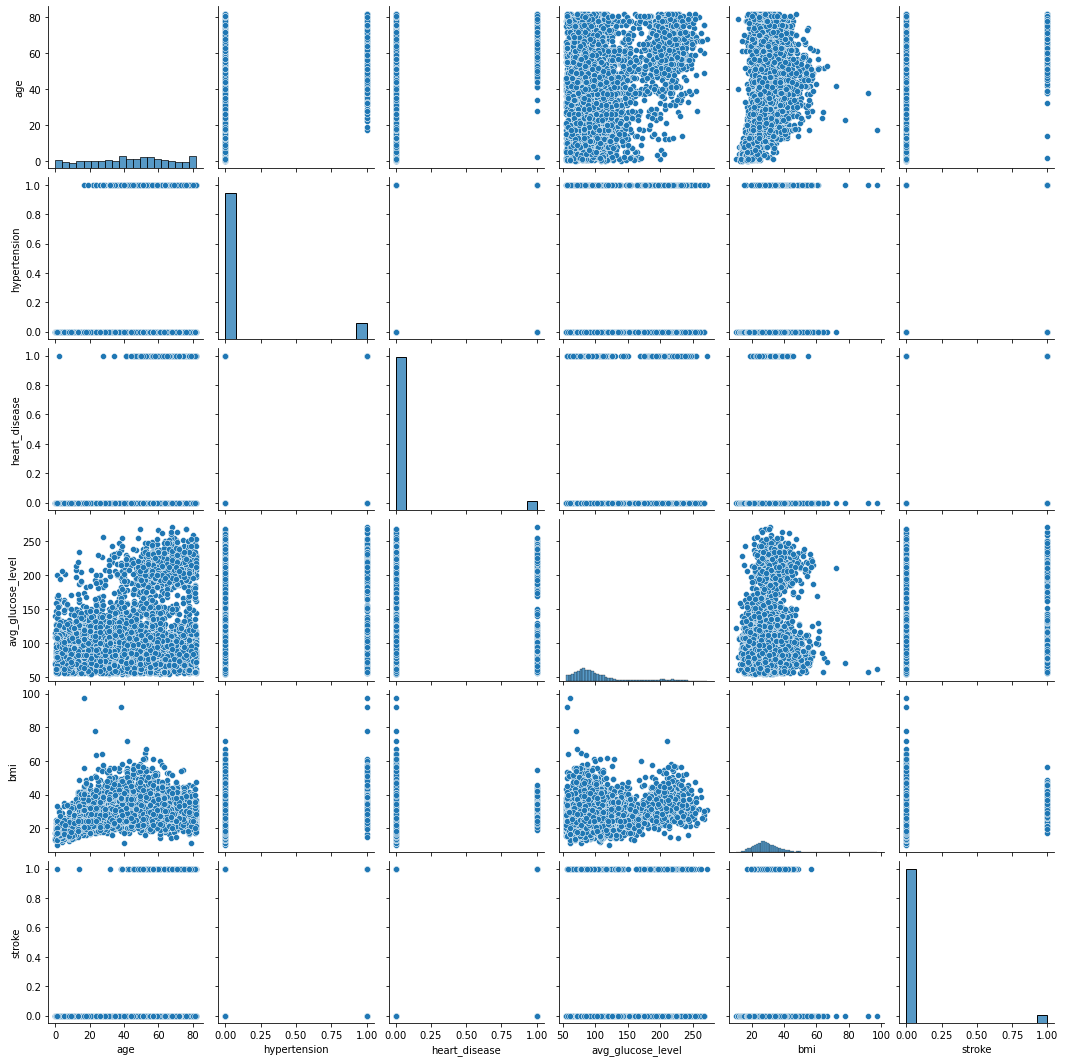

In [5]:
sns.pairplot(data)

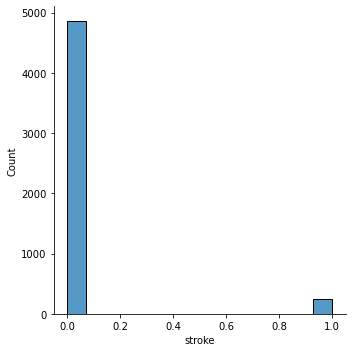

In [6]:
sns.displot(target)

It is found that there is a great imbalance in the binary target variables.


Here we see some null values in 'bmi'

In [7]:
print("Skewness: %f" % target.skew())

Skewness: 4.193284


In [8]:
print("Skewness: %f" % target.kurt())

Skewness: 15.589736


<AxesSubplot:>

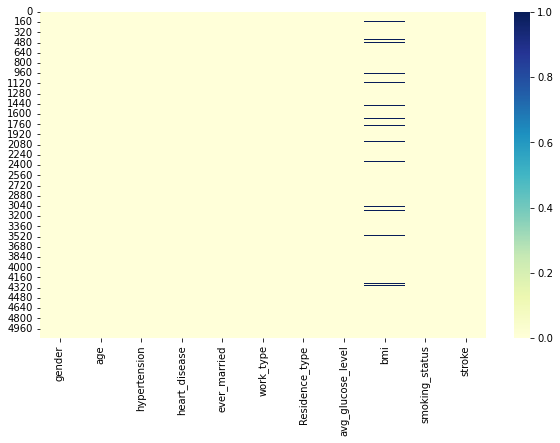

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap="YlGnBu")

In [10]:
data.isnull().sum() #checking null values


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
data['bmi'].value_counts()
data['bmi'].describe()
knn = KNNImputer()

train_num = data.select_dtypes(np.number)
train_num_transformed = knn.fit_transform(train_num)
train_num = pd.DataFrame(train_num_transformed, columns=train_num.columns, index=data.index)


In [12]:
data1 = data.loc[:, ~data.columns.isin(['hypertension', 'heart_disease', 'stroke'])]

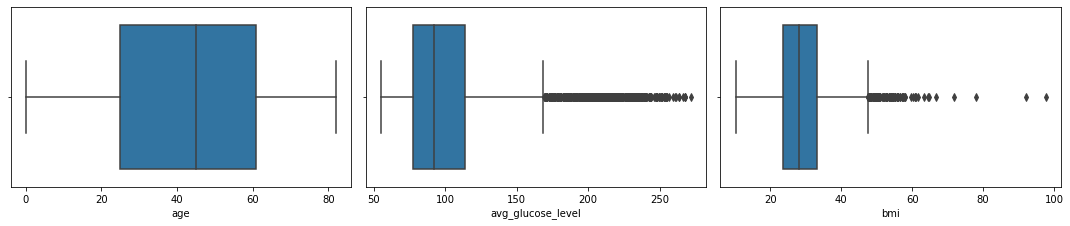

In [13]:
#data1['ever_married_num'] = data1['ever_married'].replace({'Yes':'5','No':'0'}).astype(float)
#num_cols = ['ever_married_num']
#for col in num_cols:
 #   sns.boxplot(y = target.astype('category'), x = col, data=data1)
  #  plt.show()
#sns.boxplot(data = data1.loc[:,['age', 'bmi']])
cols = 3
rows = 3
num_cols = data1.select_dtypes(exclude='object').columns
num_cols = num_cols
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=data1[col], ax=ax)
    
fig.tight_layout()  
plt.show()

In [14]:
numerical_feature = ['age', 'avg_glucose_level', 'bmi']

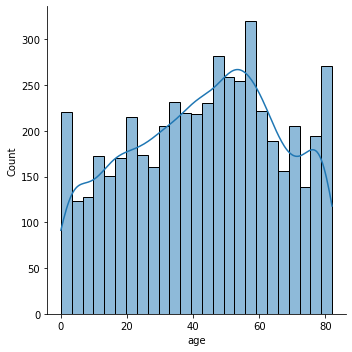

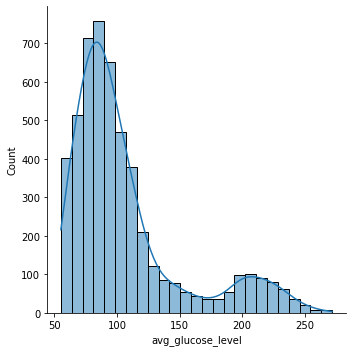

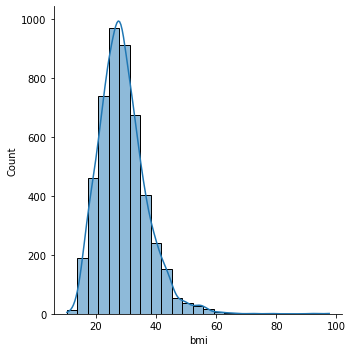

In [15]:
for feature in numerical_feature:
    sns.displot(data[feature], kde=True, bins=25)

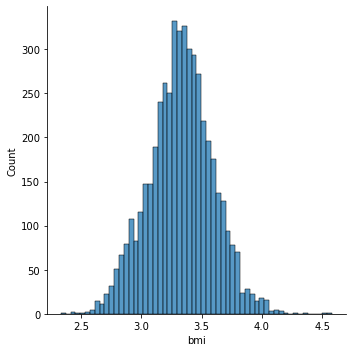

In [16]:
data['bmi'] = np.log(data['bmi'])
sns.displot(data['bmi'])

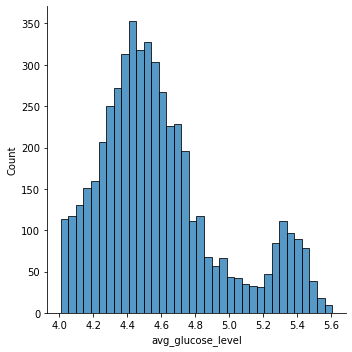

In [17]:
data['avg_glucose_level'] = np.log(data['avg_glucose_level'])
sns.displot(data['avg_glucose_level'])

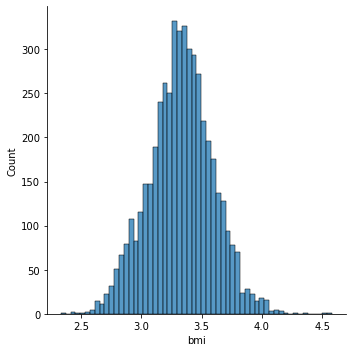

In [18]:
sns.displot(data['bmi'])

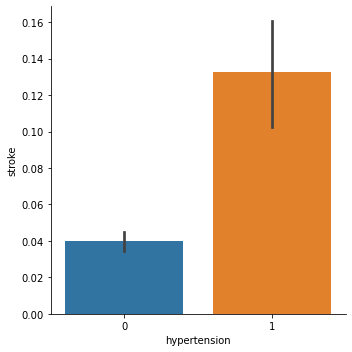

In [19]:
data2 = data
sns.catplot(x="hypertension", y="stroke", kind="bar", data=data2)

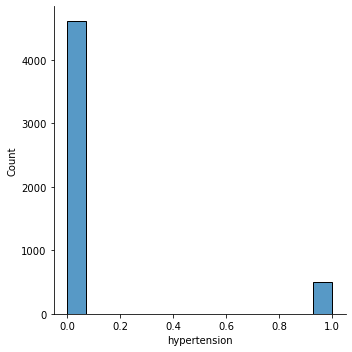

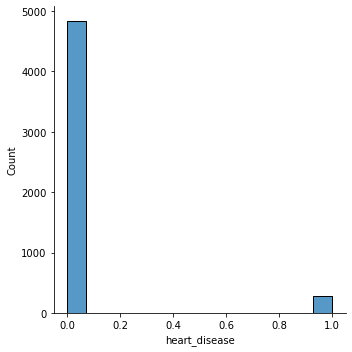

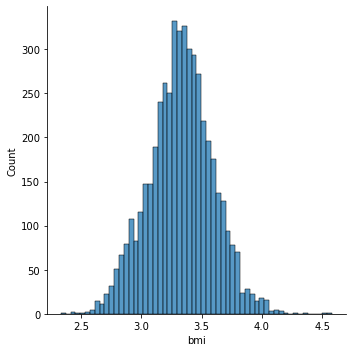

In [20]:
sns.displot(data2.hypertension)
sns.displot(data2.heart_disease)
sns.displot(data['bmi'])


In [21]:
categorical_features = identify_nominal_columns(data)
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

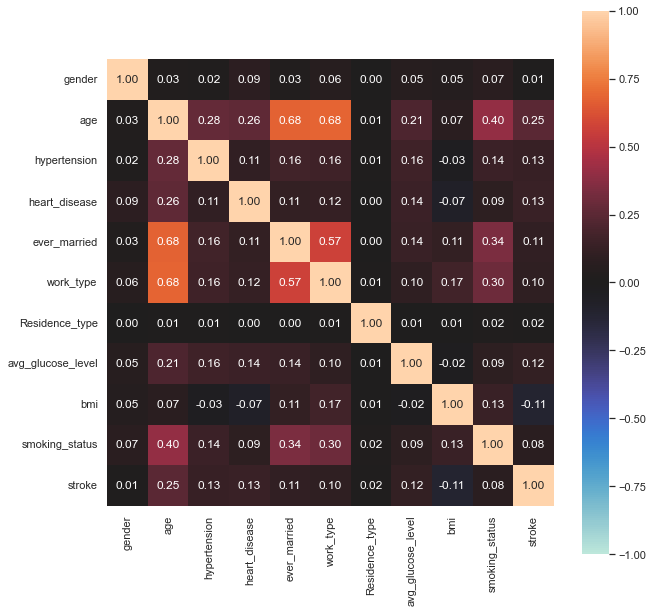

In [22]:
sns.set(font_scale = 1.0)
complete_correlation= associations(data, filename= 'complete_correlation.png', figsize=(10,10))

In [23]:
train_obj = data.select_dtypes('object')

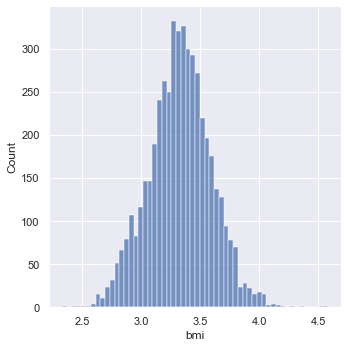

In [24]:
sns.displot(data['bmi'])

In [25]:
data = pd.concat([train_num, train_obj], axis=1)

In [26]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0.0,1.0,228.69,36.60,1.0,Male,Yes,Private,Urban,formerly smoked
1,61.0,0.0,0.0,202.21,31.38,1.0,Female,Yes,Self-employed,Rural,never smoked
2,80.0,0.0,1.0,105.92,32.50,1.0,Male,Yes,Private,Rural,never smoked
3,49.0,0.0,0.0,171.23,34.40,1.0,Female,Yes,Private,Urban,smokes
4,79.0,1.0,0.0,174.12,24.00,1.0,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,83.75,27.12,0.0,Female,Yes,Private,Urban,never smoked
5106,81.0,0.0,0.0,125.20,40.00,0.0,Female,Yes,Self-employed,Urban,never smoked
5107,35.0,0.0,0.0,82.99,30.60,0.0,Female,Yes,Self-employed,Rural,never smoked
5108,51.0,0.0,0.0,166.29,25.60,0.0,Male,Yes,Private,Rural,formerly smoked


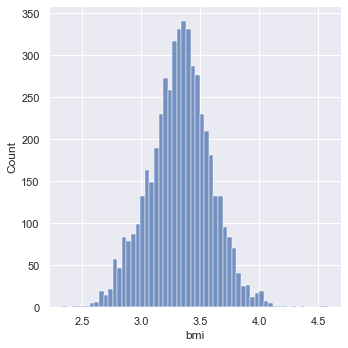

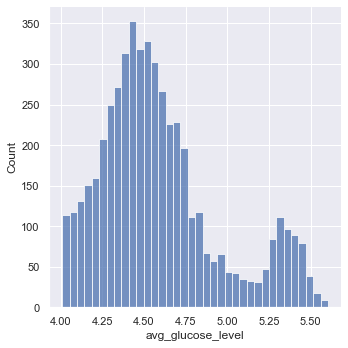

In [27]:
data['bmi'] = np.log(data['bmi'])
sns.displot(data['bmi'])
data['avg_glucose_level'] = np.log(data['avg_glucose_level'])
sns.displot(data['avg_glucose_level'])

In [28]:
data['bmi'].describe()

count    5110.000000
mean        3.330965
std         0.262385
min         2.332144
25%         3.165475
50%         3.339322
75%         3.499533
max         4.580877
Name: bmi, dtype: float64

In [29]:
data['bmi'].isnull().sum()

0

In [30]:
data.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
gender               0
ever_married         0
work_type            0
Residence_type       0
smoking_status       0
dtype: int64

In [31]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0.0,1.0,5.432367,3.600048,1.0,Male,Yes,Private,Urban,formerly smoked
1,61.0,0.0,0.0,5.309307,3.446171,1.0,Female,Yes,Self-employed,Rural,never smoked
2,80.0,0.0,1.0,4.662684,3.481240,1.0,Male,Yes,Private,Rural,never smoked
3,49.0,0.0,0.0,5.143008,3.538057,1.0,Female,Yes,Private,Urban,smokes
4,79.0,1.0,0.0,5.159745,3.178054,1.0,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,Female,Yes,Private,Urban,never smoked
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,Female,Yes,Self-employed,Urban,never smoked
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,Female,Yes,Self-employed,Rural,never smoked
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,Male,Yes,Private,Rural,formerly smoked


In [32]:
data['avg_glucose_level'].describe()

count    5110.000000
mean        4.592465
std         0.361985
min         4.009513
25%         4.346982
50%         4.520538
75%         4.736988
max         5.604846
Name: avg_glucose_level, dtype: float64

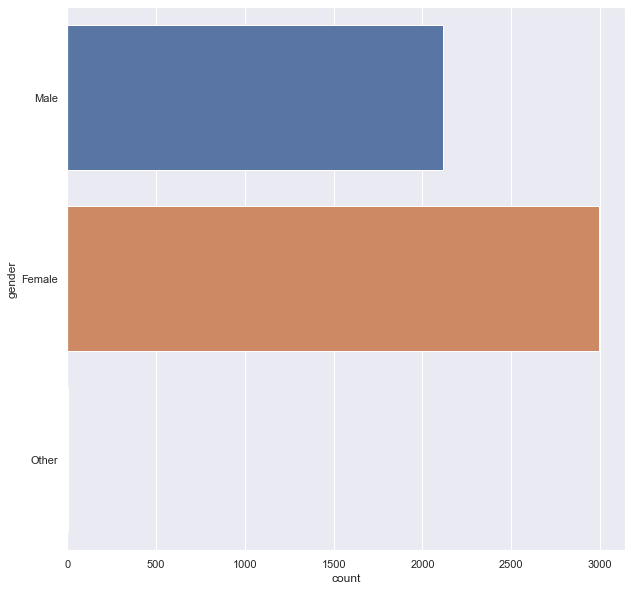

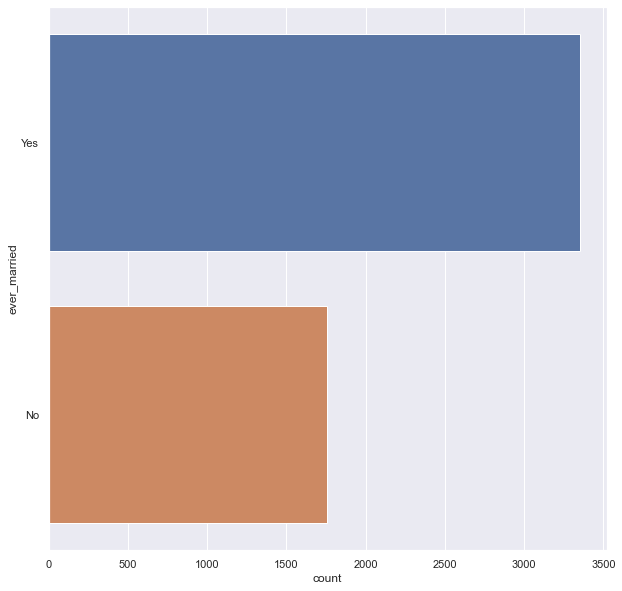

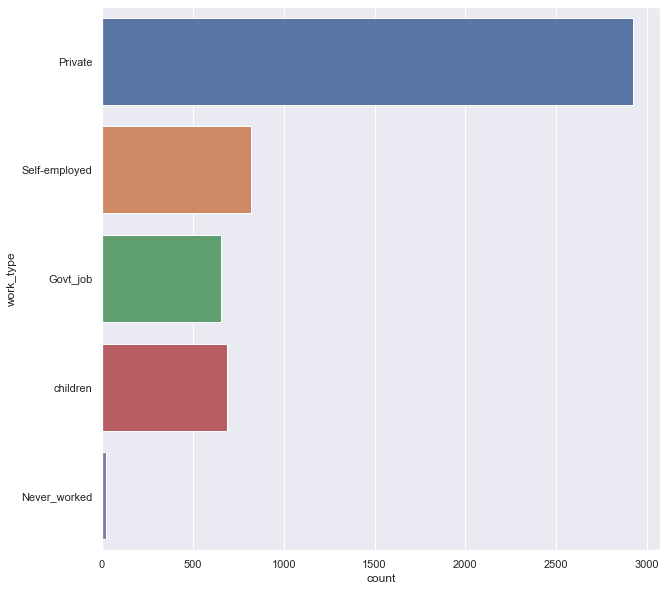

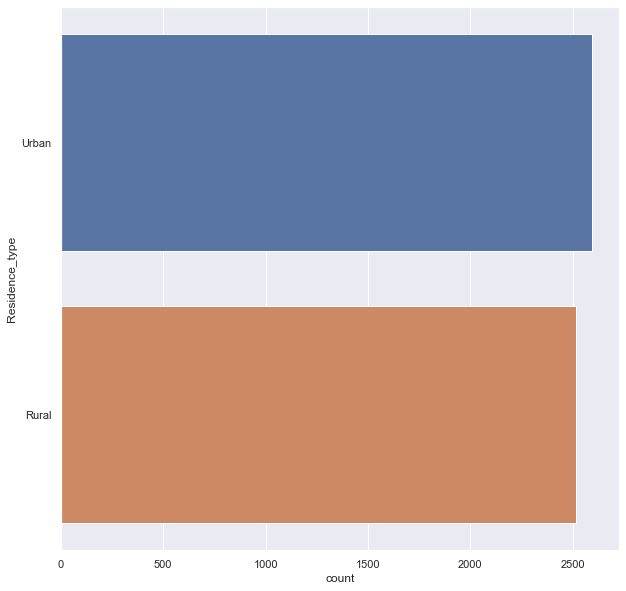

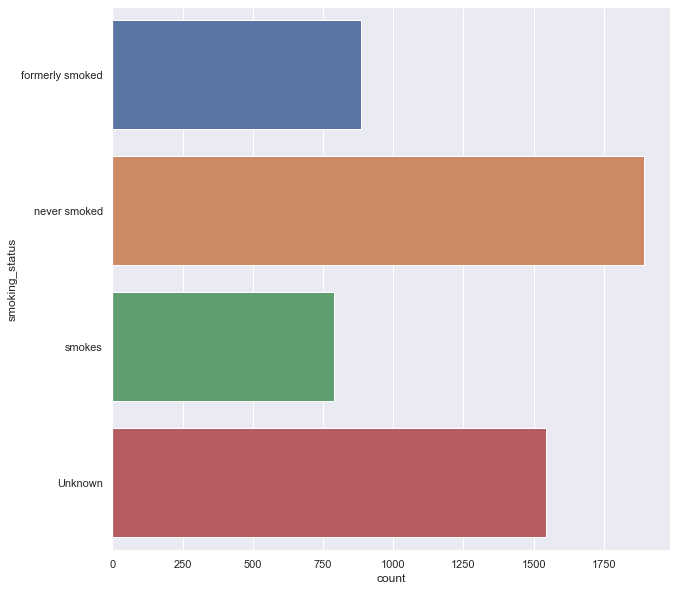

In [33]:
for col in train_obj:
    if train_obj[col].nunique() <= 22:
        sns.countplot(y=col, data=train_obj)
        plt.show()

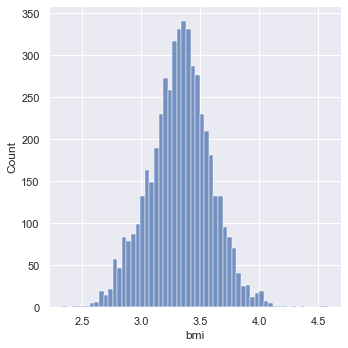

In [34]:
sns.displot(data['bmi'])

In [35]:
data = pd.get_dummies(data)
data_3 = data
data_3

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [36]:
X = data.loc[:,data.columns != 'stroke']

In [37]:
feature_names = X.columns

In [38]:
feature_names

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [39]:
y = target

In [40]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)

In [42]:
smote = SMOTE(random_state = 14)
X_train_3, y_train_3 = smote.fit_resample(X_train, y_train)

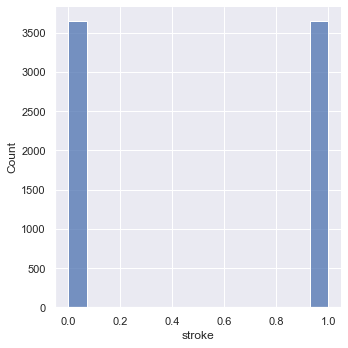

In [43]:
sns.displot(y_train_3)

In [44]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train_3, y_train_3)

RandomForestRegressor()

In [45]:
#np.argsort(importances)

<AxesSubplot:>

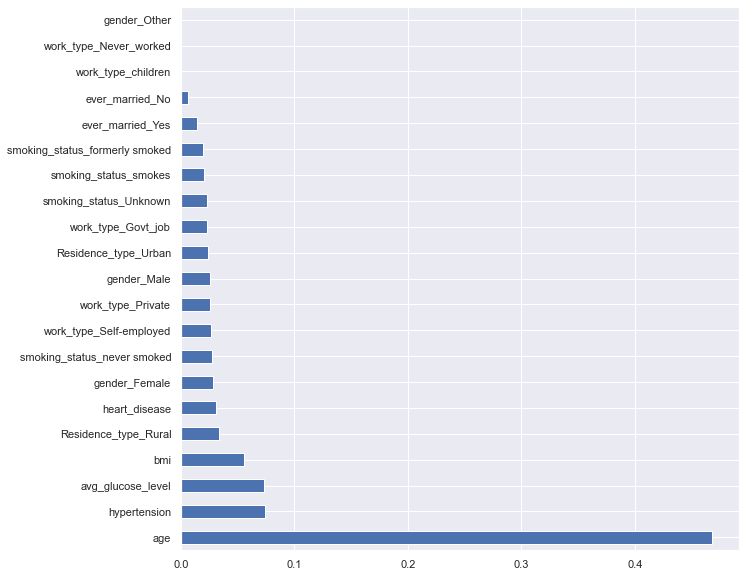

In [46]:
(pd.Series(rf.feature_importances_, index = X.columns).nlargest(21).plot(kind = 'barh'))

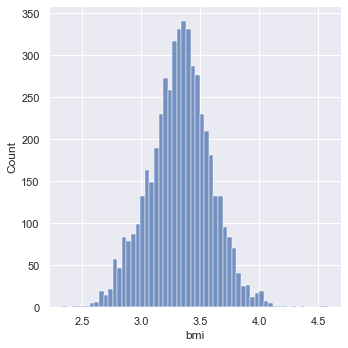

In [47]:
sns.displot(data['bmi'])

In [48]:
#data_3 = data_3.drop(['gender_Other', 'work_type_Never_worked', 'work_type_children'], axis = 1)

In [49]:
#data = data.drop(['gender_Other', 'work_type_Never_worked', 'work_type_children'], axis = 1)


In [50]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [51]:
balanced_X = data.loc[:,data.columns != 'stroke']
#balanced_X = data_3.loc[:,data_3.columns != 'stroke']

In [52]:
balanced_y = data['stroke']
#balanced_y = data_3['stroke']

In [53]:
#X_train, X_test, y_train, y_test = train_test_split(balanced_X, balanced_y, test_size = 0.25, random_state = 12)
#X_train, X_test, y_train, y_test = train_test_split(balanced_X, balanced_y, test_size = 0.25, random_state = 12)

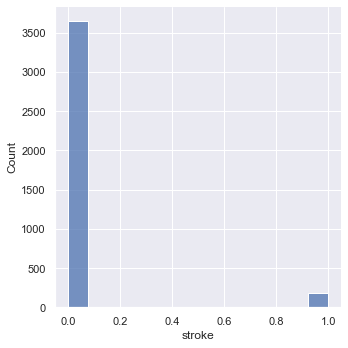

In [54]:
sns.displot(y_train)

In [55]:
from imblearn.over_sampling import RandomOverSampler
OS=RandomOverSampler()
from collections import Counter
X_os,y_os=OS.fit_resample(balanced_X,balanced_y)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.33,random_state=10)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

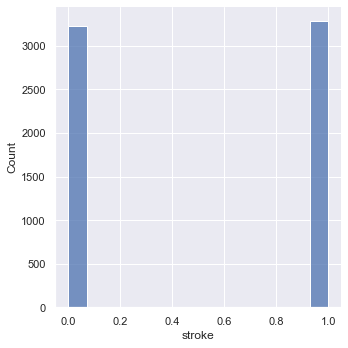

In [58]:
sns.displot(y_train)

In [59]:
#smote = SMOTE(random_state = 14)
#X_train_4, y_train_4 = smote.fit_resample(X_train_scaled, y_train)

In [60]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.model_selection import KFold 
#from sklearn.model_selection import GridSearchCV
#log_class=LogisticRegression()

#grid={'C':10.0**np.arange(0,10)}
#cv=KFold(n_splits=5,shuffle=False,random_state=None
         
#clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro') 
#clf.fit(X_train_scaled,y_train)

#y_pred=clf.predict(X_test_scaled)
         
#print(confusion_matrix(y_test,y_pred))
#print(accuracy_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))

In [61]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

In [62]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1206,  427],
       [ 268, 1308]], dtype=int64)

Text(0.5, 637.6, 'Predicted label')

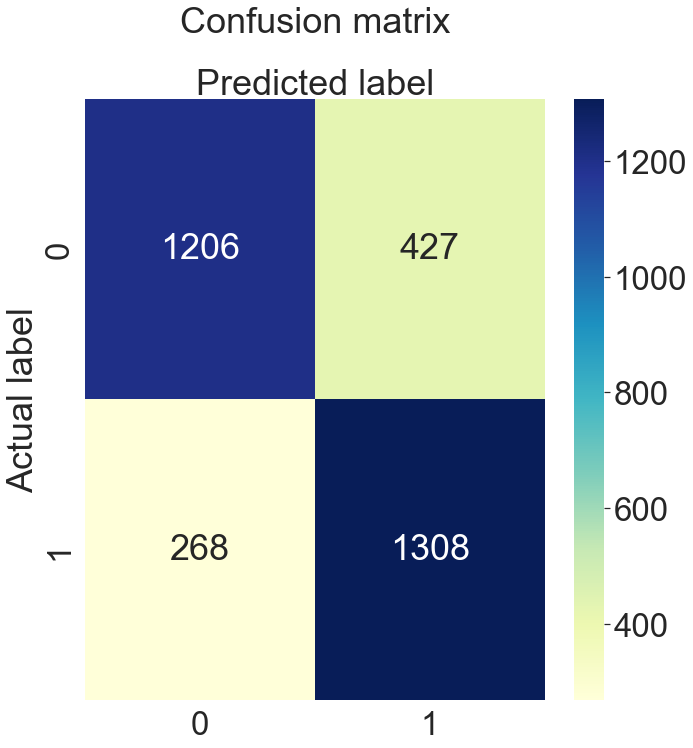

In [63]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 3.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '18'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7834216266749766
Precision: 0.7538904899135447
Recall: 0.8299492385786802


In [65]:
print("F1_score:",metrics.f1_score(y_test, y_pred))

F1_score: 0.7900936273029295


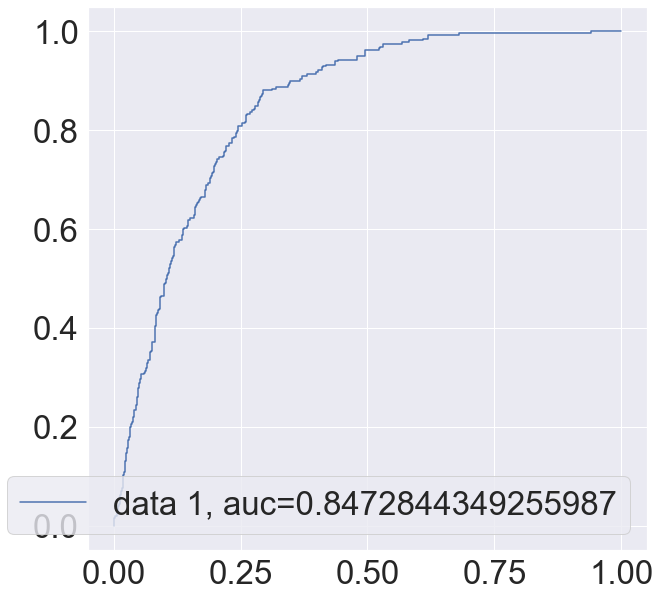

In [66]:
y_pred_proba = logreg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [67]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
cnf_matrix

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


array([[1591,   42],
       [   0, 1576]], dtype=int64)

In [68]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,5.432367,3.600048,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0.0,0.0,5.309307,3.446171,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0.0,1.0,4.662684,3.481240,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0.0,0.0,5.143008,3.538057,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1.0,0.0,5.159745,3.178054,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,4.427836,3.300271,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0.0,0.0,4.829912,3.688879,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0.0,0.0,4.418720,3.421000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0.0,0.0,5.113733,3.242592,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


Text(0.5, 637.6, 'Predicted label')

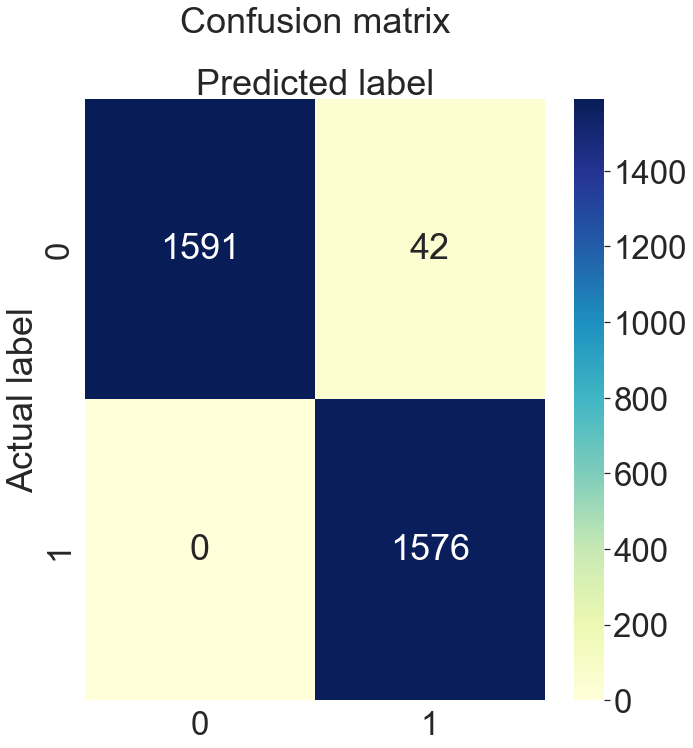

In [69]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 3.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '18'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))

Accuracy: 0.9869118105328762
Precision: 0.9740420271940667
Recall: 1.0


In [71]:
print("F1_score:",metrics.f1_score(y_test, y_pred_rf))

F1_score: 0.9868503443957419


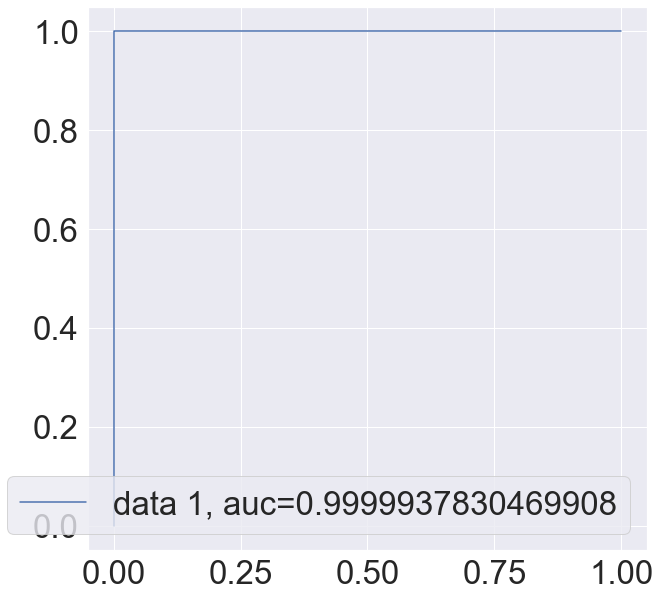

In [72]:
y_pred_proba = rf_model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [73]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_nb = gnb.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_nb)
cnf_matrix

array([[ 423, 1210],
       [  12, 1564]], dtype=int64)

In [ ]:
data

In [ ]:
class_names=[0,1] # name  of classes
sns.set(font_scale = 3.0)
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
label_font = {'size': '18'}
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nb))
print("Precision:",metrics.precision_score(y_test, y_pred_nb))
print("Recall:",metrics.recall_score(y_test, y_pred_nb))
print("F1_score:",metrics.f1_score(y_test, y_pred_nb))

Accuracy: 0.6191960112184481
Precision: 0.5638067772170151
Recall: 0.9923857868020305
F1_score: 0.719080459770115


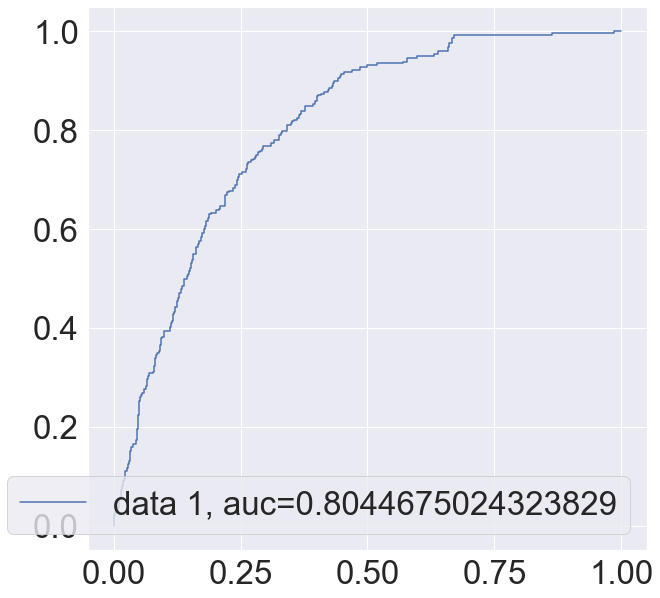

In [75]:
y_pred_proba = gnb.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [76]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scaled,y_train)
y_pred_dt = clf.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))
print("F1_score:",metrics.f1_score(y_test, y_pred_dt))

Accuracy: 0.9703957619196011
Precision: 0.943147815679234
Recall: 1.0
F1_score: 0.970742223591007


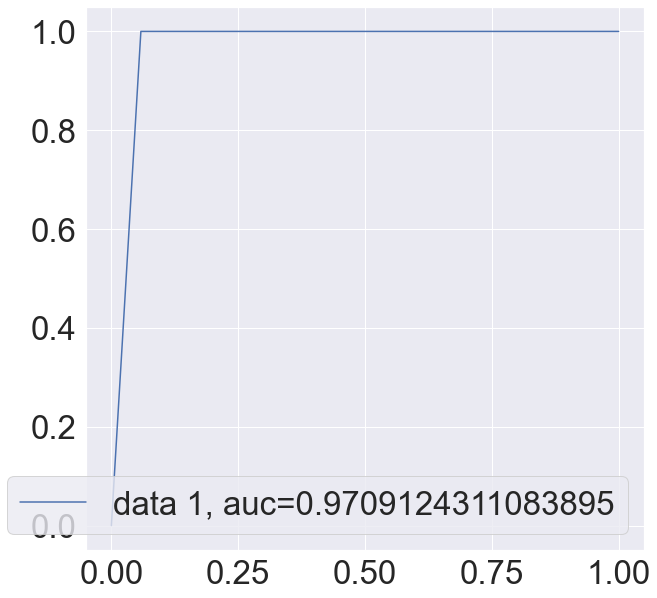

In [77]:
y_pred_proba = clf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [78]:
sgdcf = SGDClassifier(loss="hinge", penalty="l2", max_iter=7)
sgdcf.fit(X_train_scaled,y_train)
y_pred_sgd = sgdcf.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_sgd)
cnf_matrix

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[1137,  496],
       [ 362, 1214]], dtype=int64)

In [79]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sgd))
print("Precision:",metrics.precision_score(y_test, y_pred_sgd))
print("Recall:",metrics.recall_score(y_test, y_pred_sgd))
print("F1_score:",metrics.f1_score(y_test, y_pred_sgd))

Accuracy: 0.732626986600187
Precision: 0.7099415204678362
Recall: 0.7703045685279187
F1_score: 0.7388922702373706


In [80]:
knnmod = KNeighborsClassifier(n_neighbors=3)
knnmod.fit(X_train_scaled,y_train)
y_pred_knn= knnmod.predict(X_test_scaled) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))
print("F1_score:",metrics.f1_score(y_test, y_pred_knn))

Accuracy: 0.9376752882517918
Precision: 0.8909090909090909
Recall: 0.9949238578680203
F1_score: 0.9400479616306954


In [81]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cnf_matrix

array([[1441,  192],
       [   8, 1568]], dtype=int64)

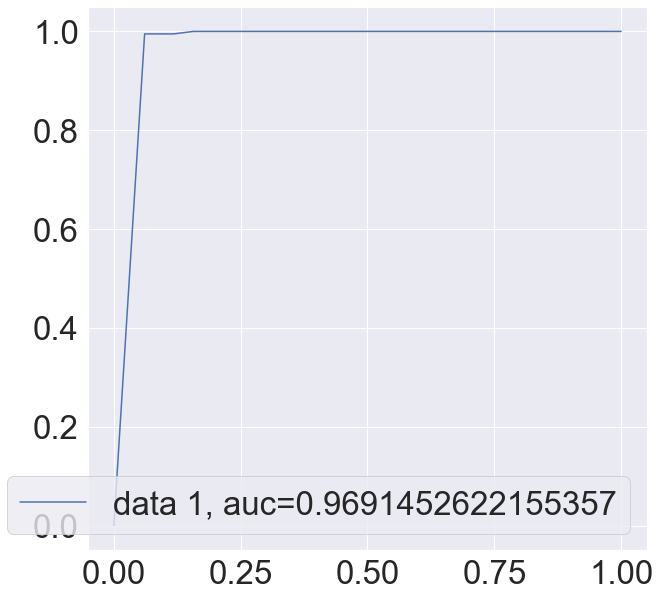

In [82]:
y_pred_proba = knnmod.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()